In [4]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import linalg, integrate, misc
from matplotlib import pyplot as plt
from matplotlib import cm

In [13]:
k = 10
N = 1000
dim=2

def euqlid(p1, p2):
    #x1, y1 = p1
    #x2, y2 = p2
    #return np.sqrt((x1-x2)**2 + (y1-y2)**2)
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def manhatten(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return np.abs(x1-x2) + np.abs(y1-y2)

def create_clusters(data, centers, distance):
    clusters = np.zeros(N)

    for i in range(N):
        dst = np.zeros(k)
        
        for j in range(k):
            dst[j] = distance(data[i], centers[j])

        clusters[i] = np.argmin(dst)

    return clusters


def update_centers(data, clusters):
    new_centers = np.zeros((k,dim))

    for cluster_id in range(k):
        new_centers[cluster_id] = np.mean(data[clusters == cluster_id], axis=0)

    return new_centers


def k_means(data, centers, dst):
    clusters = np.zeros(N)
    iteration = 1
    #dst = lambda x, y: linalg.norm(x-y)
    for i in range(100):
        new_clusters = create_clusters(data, centers, dst)
        if np.array_equal(new_clusters, clusters):
            break
        clusters = new_clusters
        centers = update_centers(data, clusters)
        iteration+=1

    return clusters, centers, iteration

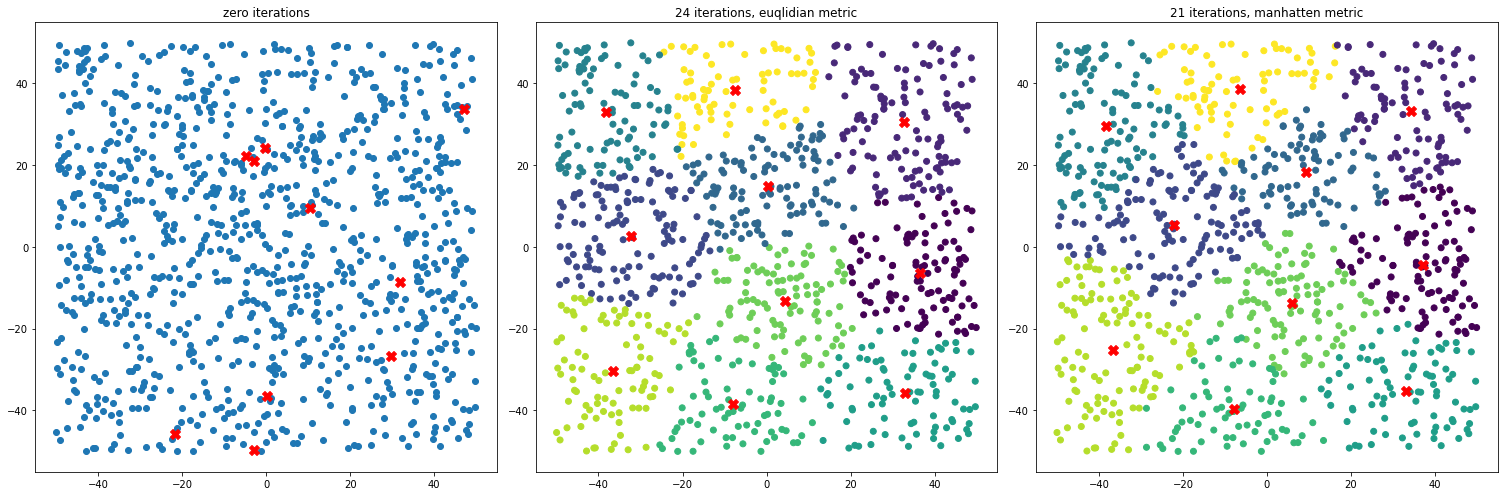

In [16]:
mins = (-50, -50)
maxs = (50, 50)
data = np.random.uniform(low=mins, high=maxs, size=(N,dim))
initial_centers = np.random.uniform(low=mins, high=maxs, size=(k,dim))
#initial_centers = np.zeros((k, dim)) + np.random.uniform(low=(-5, -5),high=(5, 5), size=(k,dim))
#initial_centers = np.array([[-25, 25], [25, 25], [25, -25], [-25, -25]])

plt.figure(figsize=(21, 7))
plt.subplot(1, 3, 1)
plt.scatter(data[...,0], data[...,1])
plt.scatter(initial_centers[...,0], initial_centers[...,1], s=100, color='red', marker='X')
#plt.scatter(data[...,0], data[...,1], data[...,2])
#plt.scatter(centers[...,0], centers[...,1], centers[...,2], color='red', marker='x')
plt.title(f'zero iterations')


clusters, centers, iteration = k_means(data, initial_centers, euqlid)
plt.subplot(1,3,2)
plt.scatter(data[...,0], data[...,1], c=clusters)
plt.scatter(centers[...,0], centers[...,1], s=100, color='red', marker='X')
#plt.scatter(data[...,0], data[...,1], data[...,2], c=clusters)
#plt.scatter(centers[...,0], centers[...,1], centers[...,2], color='red', marker='x')
plt.title(f'{iteration} iterations, euqlidian metric')


clusters, centers, iteration = k_means(data, initial_centers, manhatten)
plt.subplot(1,3,3)
plt.scatter(data[...,0], data[...,1], c=clusters)
plt.scatter(centers[...,0], centers[...,1], s=100, color='red', marker='X')
#plt.scatter(data[...,0], data[...,1], data[...,2], c=clusters)
#plt.scatter(centers[...,0], centers[...,1], centers[...,2], color='red', marker='x')
plt.title(f'{iteration} iterations, manhatten metric')

plt.tight_layout()

In [29]:
centers

array([[-25.13851037,  27.2572428 ],
       [ 28.01103183,  24.71959841],
       [ 27.95335544, -22.7840286 ],
       [-21.49085231, -24.30372487]])